In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objs as go
import plotly
import os
import seaborn as sns
from plotly.graph_objs import *
from ipywidgets import Image, HTML, Layout, Output, VBox, HBox
from IPython.display import Audio, display

In [3]:
import imageio
#import PIL
from PIL import Image, ImageEnhance, ImageFilter
#!pip install librosa==0.7.1
import librosa
import librosa.display
import pylab

In [8]:
PROJECT_HOME = '/Users/marathomas/Documents/Bioinformatik/Masterarbeit/Unsup_clustering/coati_downsample/'
IMAGES_FOLDER = PROJECT_HOME+'spec_images/'
DATA_FOLDER = PROJECT_HOME+'data/'

In [13]:
os.chdir(PROJECT_HOME)

df_list=[]

for i in range(1,4):
    check = pd.read_json('data/ds'+str(i)+'.json', orient ='split', compression = 'infer')
    print('data/ds'+str(i)+'.json')
    df_list.append(check)

df = pd.concat(df_list)

data/ds1.json
data/ds2.json
data/ds3.json


In [14]:
df.shape

(2033, 13)

In [15]:
df.head()

,Name,Start,samplerate_hz,duration_s,start_s,raw_audio,denoised_spectrograms,indv,label,index_id,UMAP1,UMAP2,UMAP3
109,grunt,2:48:58.745,22050,0.080,10138.745,"[-0.00390625, -0.00390625, -0.005859375, -0.00...","[[21.1363868713, 20.6111793518, 23.7496910095,...",6887,grunt,109,9.670739,4.418707,2.416416
110,grunt,3:18:50.647,22050,0.031,11930.647,"[0.013671875, 0.01171875, 0.0078125, 0.015625,...","[[9.191781044, 7.8991680145, 5.7343931198, 2.7...",6887,grunt,110,11.735151,5.220063,4.854806
609,chirp,5:48.635,22050,0.079,348.635,"[0.017578125, 0.017578125, 0.005859375, 0.0136...","[[16.8022613525, 15.9717550278, 14.6228752136,...",6887,chirp,609,9.091060,4.764462,2.464877
610,chirp,5:53.450,22050,0.079,353.450,"[-0.0078125, -0.02734375, 0.0078125, -0.041015...","[[5.6005115509, 6.254076004, 6.4096355438, 5.6...",6887,chirp,610,9.580486,5.062622,3.355001
611,chirp,5:56.069,22050,0.135,356.069,"[-0.044921875, -0.029296875000000003, -0.02148...","[[15.1517496109, 11.6087598801, 8.7584705353, ...",6887,chirp,611,10.634771,4.980813,5.306195


In [16]:
IMAGES_FOLDER = 'spec_images/'

In [17]:
SR = 22050
FFT_WIN = 0.03 # FFT_WIN*samplerate = length of fft/n_fft (number of audio frames that go in one fft)
FFT_HOP = FFT_WIN/8 # FFT_HOP*samplerate = n of audio frames between successive ffts
FMAX = SR/2

def make_img(spec,id):
    outname = str(id)+".jpg"    
    librosa.display.specshow(spec,sr=SR, hop_length=int(FFT_HOP * SR) , fmax=FMAX, y_axis='mel', x_axis='s',cmap='inferno')
    pylab.savefig(outname, bbox_inches=None, pad_inches=0)
    pylab.close()
    #plt.imshow(spec, interpolation='nearest', aspect='equal')
    #plt.savefig(outname)

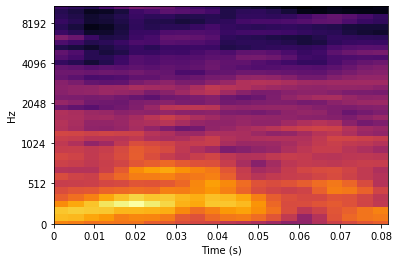

In [21]:
#os.chdir(IMAGES_FOLDER)
spec = np.asarray(df.iloc[2,6])
librosa.display.specshow(spec,sr=SR, hop_length=int(FFT_HOP * SR) , fmax=FMAX, y_axis='mel', x_axis='s',cmap='inferno')
pylab.savefig('example.jpg', bbox_inches=None, pad_inches=0)

In [23]:
os.chdir(IMAGES_FOLDER)
x = df.apply(lambda row: make_img(np.asarray(row['denoised_spectrograms']),row['index_id']), axis=1)